In [1]:
import tifffile as tiff
import numpy as np

cortical_cp = tiff.imread('/scratch/cortical_s0_cropped_dsLev1_cp.tif')
confocal_cp = tiff.imread('/scratch/confocal_s0_cropped_dsLev1_cp.tif')
print("Shapes: ")
print("Cortical: ", cortical_cp.shape)
print("Confocal: ", confocal_cp.shape)
print(np.max(cortical_cp))
print(np.max(confocal_cp))

Shapes: 
Cortical:  (427, 276, 269)
Confocal:  (427, 276, 269)
1581
165


In [3]:
from skimage import io, filters, morphology, exposure, measure
from extract_roi import get_centroid_distances, create_patches
import tifffile as tiff
from scipy.ndimage import affine_transform

matrizes = [
        [
            [1, 0, 0, 0],  # Z
            [0, 1, 0, 0],  # Y
            [0, 0, 1, 0],  # X
            [0, 0, 0, 1],
        ],
        [
            [1, 0, 0, 4],
            [0, 1, 0, 4],
            [0, 0, 1, 4],
            [0, 0, 0, 1]
        ],
        [
            [1, 0, 0, 8],
            [0, 1, 0, 8],
            [0, 0, 1, 8],
            [0, 0, 0, 1]
        ],
        [
            [1, 0, 0, 12],
            [0, 1, 0, 12],
            [0, 0, 1, 12],
            [0, 0, 0, 1]
        ],
        [
            [1, 0, 0, 16],
            [0, 1, 0, 16],
            [0, 0, 1, 16],
            [0, 0, 0, 1]
        ],
        [
            [1, 0, 0, 20],  # Z
            [0, 1, 0, 20],  # Y
            [0, 0, 1, 20],  # X
            [0, 0, 0, 1],
        ],
        [
            [1, 0, 0, 24],
            [0, 1, 0, 24],
            [0, 0, 1, 24],
            [0, 0, 0, 1]
        ],
        [
            [1, 0, 0, 28],
            [0, 1, 0, 28],
            [0, 0, 1, 28],
            [0, 0, 0, 1]
        ],
    ]
img1 = tiff.imread('/scratch/confocal_s0_cropped_dsLev1_cp.tif')
img2 = tiff.imread('/scratch/cortical_s0_cropped_dsLev1_cp.tif')
img1_regions = measure.regionprops(img1)
for m in matrizes:
    img2_cp_trans = affine_transform(img2, m)
    img2_regions = measure.regionprops(img2_cp_trans)
    cp_centroid_dist = get_centroid_distances(img1_regions, img2_regions, 15)
    print(len(cp_centroid_dist))





# cp_patches = create_patches(cp_centroid_dist, cortical_cp.shape, 0.3)

print(len(cp_centroid_dist))



114
111
94
56
41
43
43
44
44


In [5]:
import tifffile as tiff
import numpy as np
from skimage import measure

cortical_cp = tiff.imread('/scratch/cortical_s0_cropped_dsLev1_cp.tif')
confocal_cp = tiff.imread('/scratch/confocal_s0_cropped_dsLev1_cp.tif')

cort_regions = measure.regionprops(cortical_cp)
conf_regions = measure.regionprops(confocal_cp)

print(len(cort_regions), len(conf_regions))

round_cort = []
for region in cort_regions:
    if region.area > 0 and region.convex_area > 0:  # Avoid division by zero
        volume = region.area
        surface_area = region.convex_area  # Approximation of the surface area
        sphericity = (np.pi ** (1/3) * (6 * volume) ** (2/3)) / surface_area
        if sphericity > 0.8:  # Adjust threshold as needed
            round_cort.append(region)

round_conf = []
for region in conf_regions:
    if region.area > 0 and region.convex_area > 0:  # Avoid division by zero
        volume = region.area
        surface_area = region.convex_area  # Approximation of the surface area
        sphericity = (np.pi ** (1/3) * (6 * volume) ** (2/3)) / surface_area
        if sphericity > 0.8:  # Adjust threshold as needed
            round_conf.append(region)


print(len(round_cort), len(round_conf))

246 1474
24 167


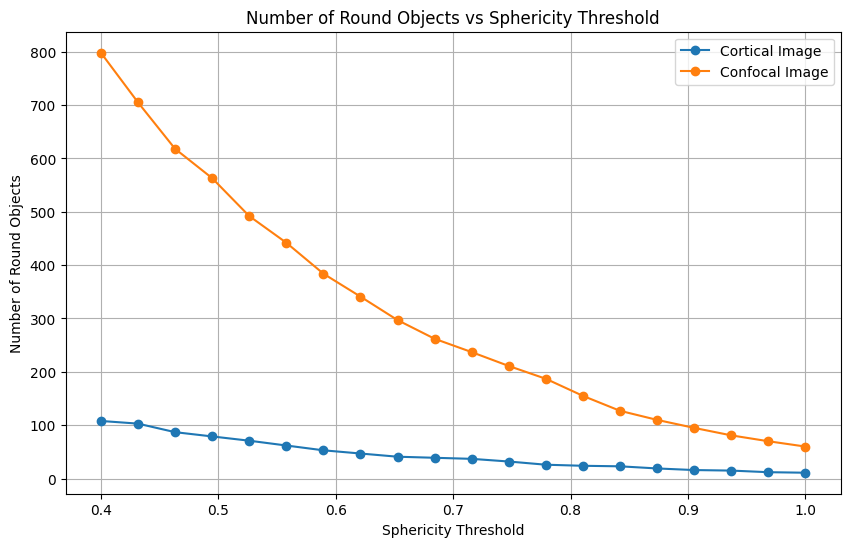

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

def calculate_sphericity_and_filter(regions, threshold):
    round_objects = []
    for region in regions:
        if region.area > 0 and region.convex_area > 0:  # Avoid division by zero
            volume = region.area
            surface_area = region.convex_area  # Approximation of the surface area
            sphericity = (np.pi ** (1/3) * (6 * volume) ** (2/3)) / surface_area
            if sphericity > threshold:  # Adjust threshold as needed
                round_objects.append(sphericity)
    return round_objects

# Calculate sphericity and filter round objects for both images
thresholds = np.linspace(0.4, 1.0, 20)  # Define a range of thresholds
round_counts_cort = []
round_counts_conf = []

cortical_cp = tiff.imread('/scratch/cortical_s0_cropped_dsLev1_cp.tif')
confocal_cp = tiff.imread('/scratch/confocal_s0_cropped_dsLev1_cp.tif')

cort_regions = measure.regionprops(cortical_cp)
conf_regions = measure.regionprops(confocal_cp)

for threshold in thresholds:
    round_cort = calculate_sphericity_and_filter(cort_regions, threshold)
    round_conf = calculate_sphericity_and_filter(conf_regions, threshold)
    round_counts_cort.append(len(round_cort))
    round_counts_conf.append(len(round_conf))

# Plot histograms
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(thresholds, round_counts_cort, label='Cortical Image', marker='o')
ax.plot(thresholds, round_counts_conf, label='Confocal Image', marker='o')

ax.set_xlabel('Sphericity Threshold')
ax.set_ylabel('Number of Round Objects')
ax.set_title('Number of Round Objects vs Sphericity Threshold')
ax.legend()
ax.grid(True)

plt.show()

In [7]:
cortical_cp = tiff.imread('/scratch/cortical_s0_cropped_dsLev1_cp.tif')
confocal_cp = tiff.imread('/scratch/confocal_s0_cropped_dsLev1_cp.tif')

cort_regions = measure.regionprops(cortical_cp)
conf_regions = measure.regionprops(confocal_cp)

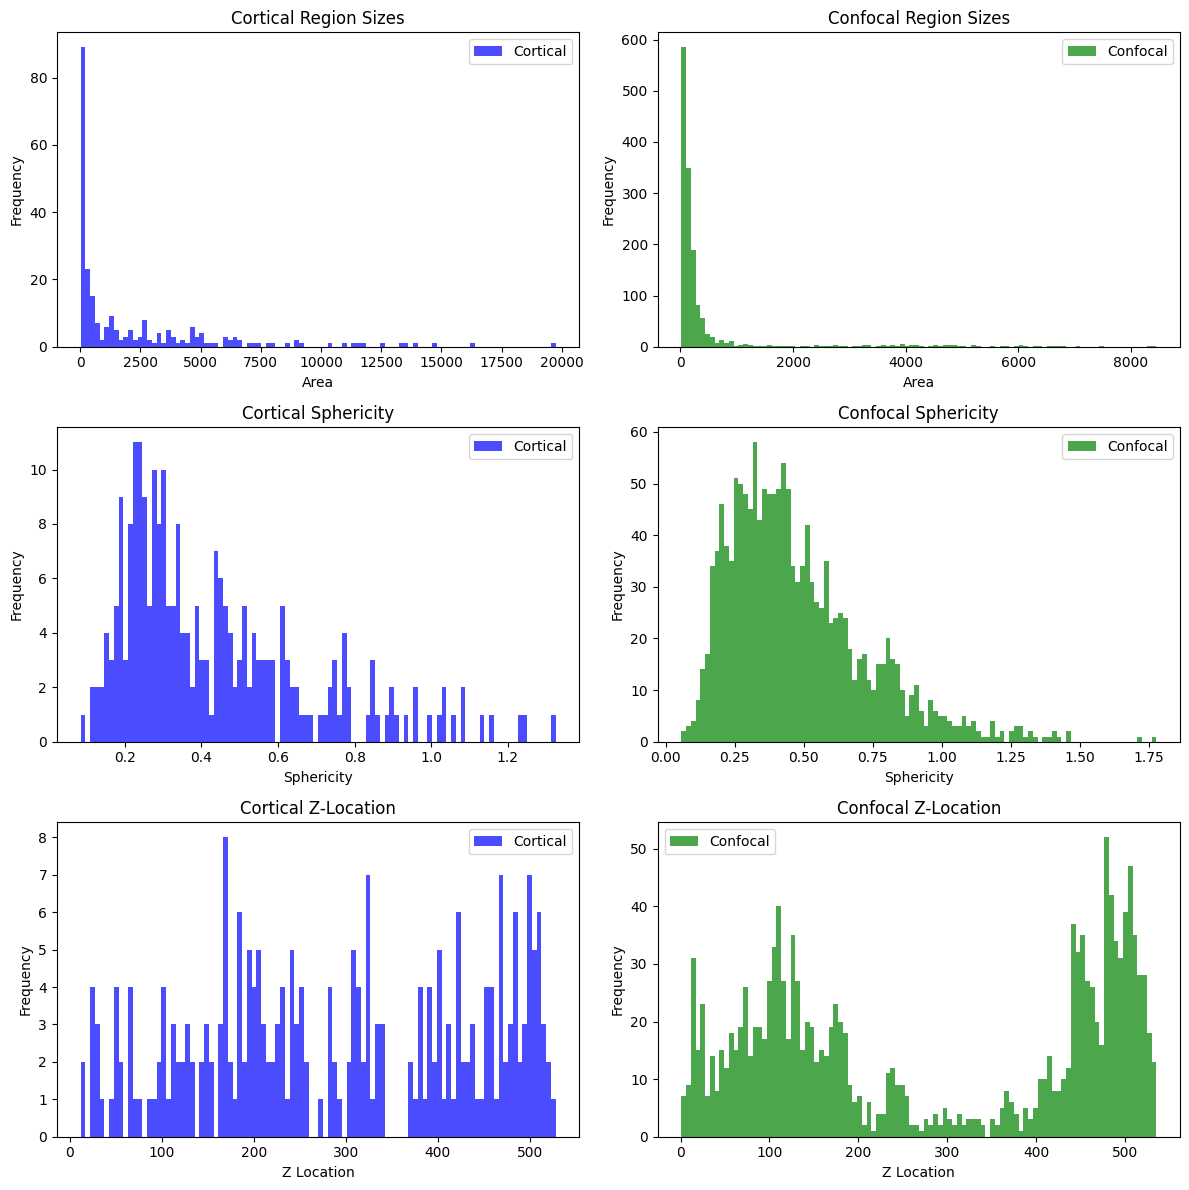

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

# Ensure plots are displayed in the notebook
%matplotlib inline

# Assuming you already have cort_regions and conf_regions from measure.regionprops
cort_regions = measure.regionprops(cortical_cp)
conf_regions = measure.regionprops(confocal_cp)

# Extract properties for cortical and confocal images
cort_sizes = [region.area for region in cort_regions]
conf_sizes = [region.area for region in conf_regions]

cort_sphericity = [(np.pi ** (1/3) * (6 * region.area) ** (2/3)) / region.convex_area for region in cort_regions if region.area > 0 and region.convex_area > 0]
conf_sphericity = [(np.pi ** (1/3) * (6 * region.area) ** (2/3)) / region.convex_area for region in conf_regions if region.area > 0 and region.convex_area > 0]

cort_z = [region.centroid[2] for region in cort_regions]
conf_z = [region.centroid[2] for region in conf_regions]

# Plot histograms
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

bins = 100
# Histogram of region sizes
axs[0, 0].hist(cort_sizes, bins=bins, color='blue', alpha=0.7, label='Cortical')
axs[0, 0].set_title('Cortical Region Sizes')
axs[0, 0].set_xlabel('Area')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].legend()

axs[0, 1].hist(conf_sizes, bins=bins, color='green', alpha=0.7, label='Confocal')
axs[0, 1].set_title('Confocal Region Sizes')
axs[0, 1].set_xlabel('Area')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].legend()

# Histogram of sphericity
axs[1, 0].hist(cort_sphericity, bins=bins, color='blue', alpha=0.7, label='Cortical')
axs[1, 0].set_title('Cortical Sphericity')
axs[1, 0].set_xlabel('Sphericity')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend()

axs[1, 1].hist(conf_sphericity, bins=bins, color='green', alpha=0.7, label='Confocal')
axs[1, 1].set_title('Confocal Sphericity')
axs[1, 1].set_xlabel('Sphericity')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].legend()

# Histogram of z-location
axs[2, 0].hist(cort_z, bins=bins, color='blue', alpha=0.7, label='Cortical')
axs[2, 0].set_title('Cortical Z-Location')
axs[2, 0].set_xlabel('Z Location')
axs[2, 0].set_ylabel('Frequency')
axs[2, 0].legend()

axs[2, 1].hist(conf_z, bins=bins, color='green', alpha=0.7, label='Confocal')
axs[2, 1].set_title('Confocal Z-Location')
axs[2, 1].set_xlabel('Z Location')
axs[2, 1].set_ylabel('Frequency')
axs[2, 1].legend()

plt.tight_layout()
plt.show()


In [31]:
cortical_cp = tiff.imread('/scratch/cortical_s0_cropped_dsLev1_cp.tif')
confocal_cp = tiff.imread('/scratch/confocal_s0_cropped_dsLev1_cp.tif')

# Extract properties for cortical and confocal images
cort_sizes_asc = sorted(cort_regions, key=lambda region: region.area)
conf_sizes_asc = sorted(conf_regions, key=lambda region: region.area)

print(len(cort_size_asc), len(conf_sizes_asc))

cort_cut = cort_sizes_asc[int(len(cort_sizes_asc) * 0.10):]
conf_cut = conf_sizes_asc[int(len(conf_sizes_asc) * 0.10):]

print(len(cort_cut), len(conf_cut))

cort_sph_asc = sorted(cort_cut, key=lambda region: (np.pi ** (1/3) * (6 * region.area) ** (2/3)) / region.convex_area)
conf_sph_asc = sorted(conf_cut, key=lambda region: (np.pi ** (1/3) * (6 * region.area) ** (2/3)) / region.convex_area)

cort_cut = cort_sph_asc[int(len(cort_sph_asc) * 0.15):]
conf_cut = conf_sph_asc[int(len(conf_sph_asc) * 0.15):]

print(len(cort_cut), len(conf_cut))


246 1302
67 1172
57 997


Cut out small regions

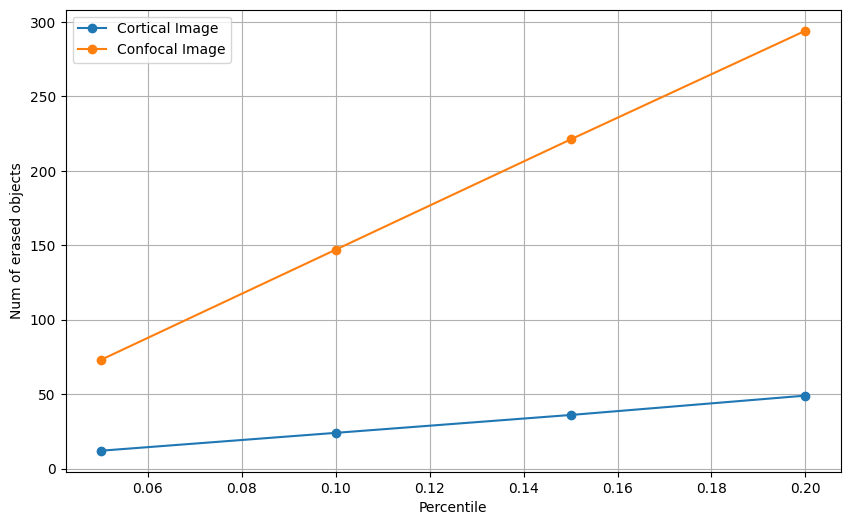

In [43]:
cortical_cp = tiff.imread('/scratch/cortical_s0_cropped_dsLev1_cp.tif')
confocal_cp = tiff.imread('/scratch/confocal_s0_cropped_dsLev1_cp.tif')

threshold = [0.05, 0.10, 0.15, 0.20]
conf_cut_len = []
cort_cut_len = []

for t in threshold:
    cort_cp = np.copy(cortical_cp)
    conf_cp = np.copy(confocal_cp)

    cort_regions = measure.regionprops(cort_cp)
    conf_regions = measure.regionprops(conf_cp)

    cort_sizes_asc = sorted(cort_regions, key=lambda region: region.area)
    conf_sizes_asc = sorted(conf_regions, key=lambda region: region.area)

    cort_l = int(len(cort_sizes_asc) * t)
    cort_cut_len.append(cort_l)
    conf_l = int(len(conf_sizes_asc) * t)
    conf_cut_len.append(conf_l)
    cort_cut = cort_sizes_asc[:cort_l]
    conf_cut = conf_sizes_asc[:conf_l]

    for c in cort_cut:
        for z,y,x, in c.coords:
            cort_cp[z, y, x] = 0
    for c in conf_cut:
        for z,y,x, in c.coords:
            conf_cp[z,y,x] = 0



    tiff.imwrite('/scratch/cortwithoutSmall' + str(t)[2:] + '.tif',cort_cp)
    tiff.imwrite('/scratch/confwithoutSmall' + str(t)[2:] + '.tif',conf_cp)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(threshold, cort_cut_len, label='Cortical Image', marker='o')
ax.plot(threshold, conf_cut_len, label='Confocal Image', marker='o')

ax.set_xlabel('Percentile')
ax.set_ylabel('Num of erased objects')
ax.legend()
ax.grid(True)

plt.show()

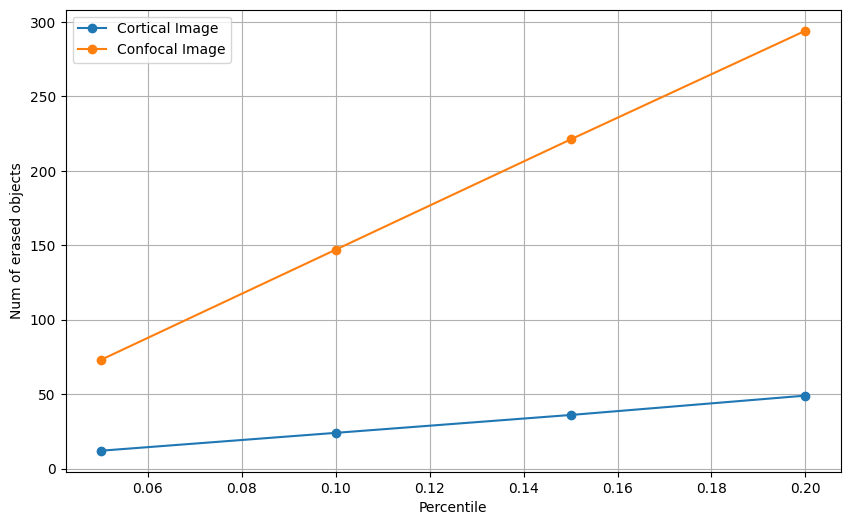

In [45]:
cortical_cp = tiff.imread('/scratch/cortical_s0_cropped_dsLev1_cp.tif')
confocal_cp = tiff.imread('/scratch/confocal_s0_cropped_dsLev1_cp.tif')

threshold = [0.05, 0.10, 0.15, 0.20]
conf_cut_len = []
cort_cut_len = []

for t in threshold:
    cort_cp = np.copy(cortical_cp)
    conf_cp = np.copy(confocal_cp)

    cort_regions = measure.regionprops(cort_cp)
    conf_regions = measure.regionprops(conf_cp)

    cort_sph_asc = sorted(cort_regions, key=lambda region: (np.pi ** (1/3) * (6 * region.area) ** (2/3)) / region.convex_area)
    conf_sph_asc = sorted(conf_regions, key=lambda region: (np.pi ** (1/3) * (6 * region.area) ** (2/3)) / region.convex_area)

    cort_l = int(len(cort_sph_asc) * t)
    cort_cut_len.append(cort_l)
    conf_l = int(len(conf_sph_asc) * t)
    conf_cut_len.append(conf_l)
    cort_cut = cort_sph_asc[:cort_l]
    conf_cut = conf_sph_asc[:conf_l]

    for c in cort_cut:
        for z,y,x, in c.coords:
            cort_cp[z, y, x] = 0
    for c in conf_cut:
        for z,y,x, in c.coords:
            conf_cp[z, y, x] = 0



    tiff.imwrite('/scratch/cortwithoutUnround' + str(t)[2:] + '.tif',cort_cp)
    tiff.imwrite('/scratch/confwithoutUnround' + str(t)[2:] + '.tif',conf_cp)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(threshold, cort_cut_len, label='Cortical Image', marker='o')
ax.plot(threshold, conf_cut_len, label='Confocal Image', marker='o')

ax.set_xlabel('Percentile')
ax.set_ylabel('Num of erased objects')
ax.legend()
ax.grid(True)

plt.show()

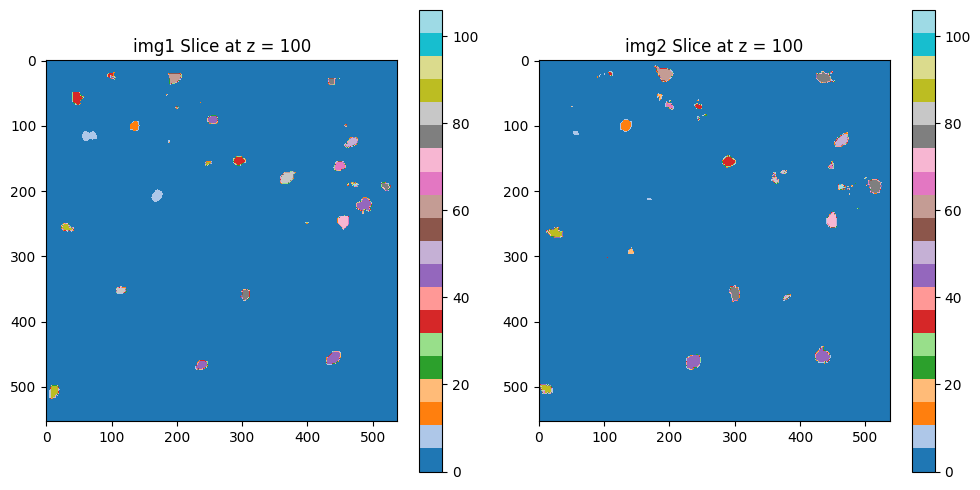

In [47]:
import tifffile as tiff
import numpy as np
from extract_roi import get_centroid_distances
from skimage import measure

cortical_cp = tiff.imread('/scratch/cortical_s0_cropped_dsLev1_cp.tif')
confocal_cp = tiff.imread('/scratch/confocal_s0_cropped_dsLev1_cp.tif')

img1_regions = measure.regionprops(cortical_cp)
img2_regions = measure.regionprops(confocal_cp)
cp_centroid_dist = get_centroid_distances(img1_regions, img2_regions, 20)

img1 = np.zeros(cortical_cp.shape, dtype=np.uint16)
img2 = np.zeros(confocal_cp.shape, dtype=np.uint16)

label = 1
for k, v in cp_centroid_dist.items():
    r1 = v['R1']
    r2 = v['R2']
    for c in r1.coords:
        z,y,x = c
        img1[z,y,x] = label
    for c in r2.coords:
        z,y,x = c
        img2[z,y,x] = label
    label += 1

import matplotlib.pyplot as plt
%matplotlib inline

# Define the slice index (z_index) you want to visualize
z_index = 100  # Adjust this to the slice you want to visualize

# Plot img1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1[z_index, :, :], cmap='tab20')  # Use a colormap that distinguishes labels
plt.title('img1 Slice at z = {}'.format(z_index))
plt.colorbar()

# Plot img2
plt.subplot(1, 2, 2)
plt.imshow(img2[z_index, :, :], cmap='tab20')  # Use the same colormap as img1 for consistency
plt.title('img2 Slice at z = {}'.format(z_index))
plt.colorbar()

plt.tight_layout()
plt.show()

tiff.imwrite('/scratch/img1.tif', img1)
tiff.imwrite('/scratch/img2.tif', img2)